In [179]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [180]:
%matplotlib inline
sns.set_style ("darkgrid")

In [181]:
STATS_DIR = "/hg191/corpora/legaldata/data/stats/"
texts_file = os.path.join (STATS_DIR, "ops.texts")
dates_file = os.path.join (STATS_DIR, "ops.dates")

In [40]:
def count_occurrences (filename, mentions):
    isPresent = list()
    with open (filename) as fin:
        for i, line in enumerate (fin):
            tokens = set (line.strip().lower().split(" "))
            isPresent.append ([mention in tokens for mention in mentions])
            if (i+1) % 1000000 == 0:
                print ("lines done: {0}".format (i+1))
    print (i+1)
    return isPresent

In [182]:
def readTexts (filename, mentions):
    isPresent = list ()
    with open (filename) as fin:
        for i,line in enumerate (fin):
            tokens = set (line.strip().split(" "))
            isPresent.append ([mention in tokens for mention in mentions])
            if (i+1) % 500000 == 0:
                print ("lines done: {0}".format (i+1))
    return isPresent
mentionsPresent = readTexts (texts_file, ["fertilization", "land", "soil", "seed", "womb", "pregnancy", "abortion", "women",
                                          "laundering", "washing", "clothes", "cleaning", "money", "funds", "illegal"])
print (len (mentionsPresent))

lines done: 500000
lines done: 1000000
lines done: 1500000
lines done: 2000000
lines done: 2500000
lines done: 3000000
lines done: 3500000
3854738


In [183]:
df = pd.DataFrame()
df["years"] = pd.Series (years)
df["fertilization"] = pd.Series ([item[0] for item in mentionsPresent])
df["land"] = pd.Series ([item[1] for item in mentionsPresent])
df["soil"] = pd.Series ([item[2] for item in mentionsPresent])
df["seed"] = pd.Series ([item[3] for item in mentionsPresent])
df["womb"] = pd.Series ([item[4] for item in mentionsPresent])
df["pregnancy"] = pd.Series ([item[5] for item in mentionsPresent])
df["abortion"] = pd.Series ([item[6] for item in mentionsPresent])
df["women"] = pd.Series ([item[7] for item in mentionsPresent])
df["laundering"] = pd.Series ([item[8] for item in mentionsPresent])
df["washing"] = pd.Series ([item[9] for item in mentionsPresent])
df["clothes"] = pd.Series ([item[10] for item in mentionsPresent])
df["cleaning"] = pd.Series ([item[11] for item in mentionsPresent])
df["money"] = pd.Series ([item[12] for item in mentionsPresent])
df["funds"] = pd.Series ([item[13] for item in mentionsPresent])
df["illegal"] = pd.Series ([item[14] for item in mentionsPresent])

In [184]:
def aggregate_df (df, word1, word2, word3):
    rows = list ()
    grouped = df.groupby(by="years")
    for name, group in grouped:
        row = list ()
        row.append (name)
        row.append (group[group[word1] == True].__len__ ())
        row.append ((group[(group[word1] == True) & (group[word2] == True)]).__len__())
        row.append ((group[(group[word1] == True) & (group[word3] == True)]).__len__())        
        rows.append (row)
    
    agg = pd.DataFrame (rows, columns=["years", "nw1", "nw1&w2", "nw1&w3"])
    return agg

In [202]:
fertilization_df = aggregate_df (df, "fertilization", "land", "pregnancy")
fertilization_df = fertilization_df[fertilization_df["nw1"] != 0]
fertilization_df["pw2|w1"] = fertilization_df["nw1&w2"] / fertilization_df["nw1"]
fertilization_df["pw3|w1"] = fertilization_df["nw1&w3"] / fertilization_df["nw1"]

In [205]:
laundering_df = aggregate_df (df, "laundering", "cleaning", "funds")
laundering_df = laundering_df[laundering_df["nw1"] != 0]
laundering_df["pw2|w1"] = laundering_df["nw1&w2"] / laundering_df["nw1"]
laundering_df["pw3|w1"] = laundering_df["nw1&w3"] / laundering_df["nw1"]

In [214]:
laundering_df[(laundering_df["years"] >= 1970) & (laundering_df["years"] < 1980)]

,years,nw1,nw1&w2,nw1&w3,pw2|w1,pw3|w1
203,1970,6,1,1,0.166667,0.166667
204,1971,5,1,1,0.200000,0.200000
205,1972,7,2,3,0.285714,0.428571
206,1973,7,2,1,0.285714,0.142857
207,1974,8,3,1,0.375000,0.125000
208,1975,7,1,2,0.142857,0.285714
209,1976,11,3,3,0.272727,0.272727
210,1977,7,0,3,0.000000,0.428571
211,1978,12,1,2,0.083333,0.166667
212,1979,8,4,3,0.500000,0.375000


Text(0,0.5,'Probability')

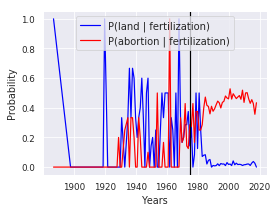

In [207]:
%matplotlib inline
sns.set_context ("paper")
fig, ax = plt.subplots(1, 1, figsize=(4,3))

sns.lineplot(x="years", y="pw2|w1", data=laundering_df, ax=ax, color='blue')
sns.lineplot(x="years", y="pw3|w1", data=laundering_df, ax=ax, color='red')
ax.axvline(x=1975, c="black")
ax.set_xlabel("Years")
ax.legend(("P(land | fertilization)", "P(abortion | fertilization)"), fontsize=10, loc="upper center")
ax.set_ylabel("Probability")

In [215]:
fertilization_df = aggregate_df (df, "fertilization", "land", "pregnancy")
fertilization_df.to_csv ("../data/frames/fertilization.timeseries", sep=",", header=True, index=False)

In [216]:
laundering_df = aggregate_df (df, "laundering", "cleaning", "funds")
laundering_df.to_csv ("../data/frames/laundering.timeseries", sep=",", header=True, index=False)